# Iris Dataset which is the classification problem Prepare a model using the DecisionTree Classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
##Drop the id column because it does not affect the Output feature much

df=df.drop(labels=['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
##Since the output feature is categorisede into three different categories so,it is multiclass classification
#I will convert it into binaryclass classification and then train the model
df=df[df['Species']!='Iris-setosa']                             ##Drop the Iris-setosa column

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [9]:
##Now check the duplicates values are present or not

df.duplicated().sum()

1

In [10]:
df.drop_duplicates(keep='first',inplace=True)           ##Drop the duplicates values

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


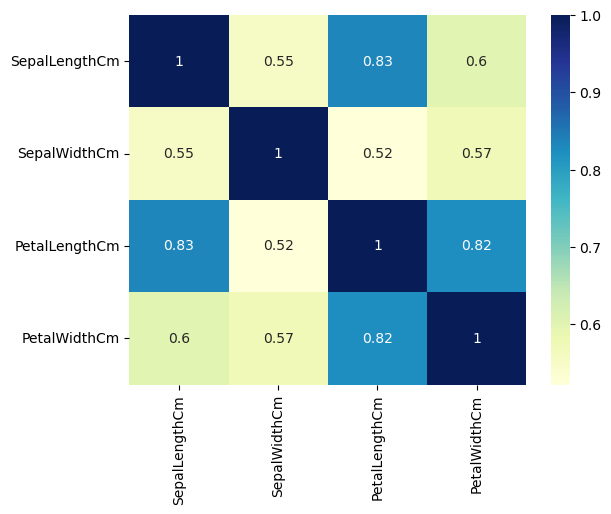

In [12]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [13]:
##Handle the categorical output feature and use the mapping to convert it into numeric value i.e 0 and 1

df['Species']=df['Species'].map({'Iris-versicolor':0,'Iris-virginica':1})

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [15]:
numerical_columns=df.columns[df.dtypes!='object']
numerical_columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

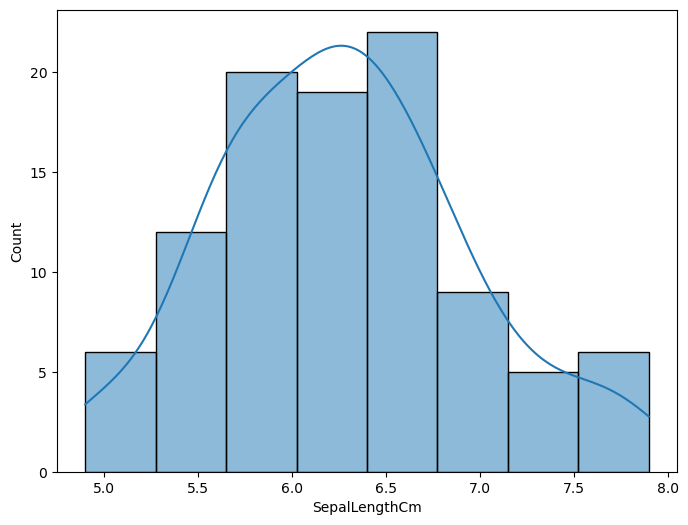

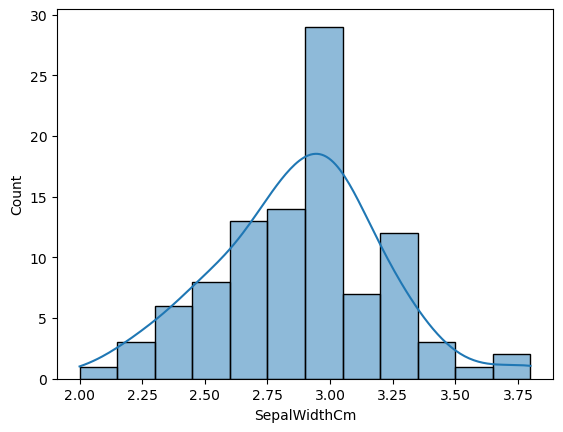

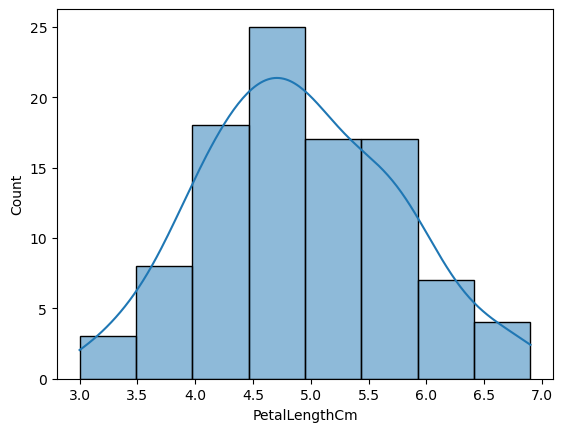

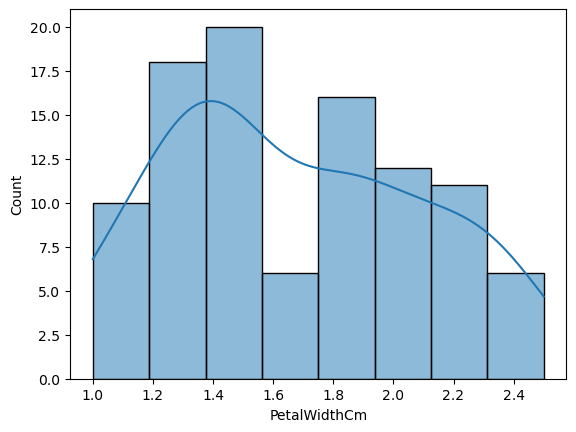

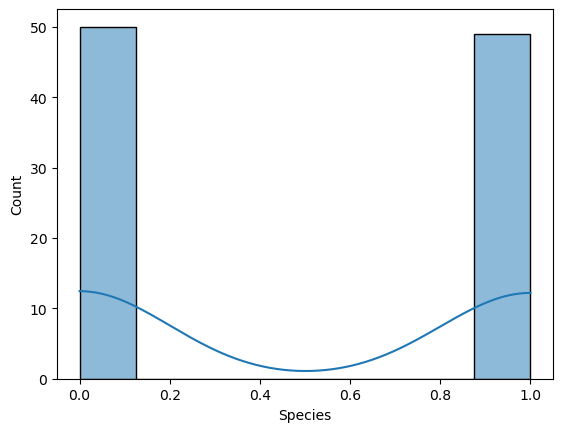

In [16]:
##Analyse the histogram plot of each numerical columns present there

plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()


In [17]:
## Independent and dependent features
X = df.drop(labels=['Species'],axis=1)
Y = df[['Species']]

In [18]:
##Train Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler          ###import the standardscaler to standardize the datasets. we standardize only the independent features of train and test datasets. 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
classifier=DecisionTreeClassifier()

In [23]:
classifier.fit(X_train,y_train)      ##apply the simply DecisionTreeClassifier without using any hyperparamater change

DecisionTreeClassifier()

[Text(0.5, 0.9285714285714286, 'x[2] <= -0.14\ngini = 0.499\nsamples = 74\nvalue = [35, 39]'),
 Text(0.2, 0.7857142857142857, 'x[3] <= -0.135\ngini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(0.1, 0.6428571428571429, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.3, 0.6428571428571429, 'x[3] <= 0.103\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.7857142857142857, 'x[3] <= 0.103\ngini = 0.136\nsamples = 41\nvalue = [3, 38]'),
 Text(0.7, 0.6428571428571429, 'x[3] <= -0.135\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.6, 0.5, 'x[1] <= 0.388\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.35714285714285715, 'x[3] <= -0.374\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.21428571428571427, 'x[2] <= 0.568\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 

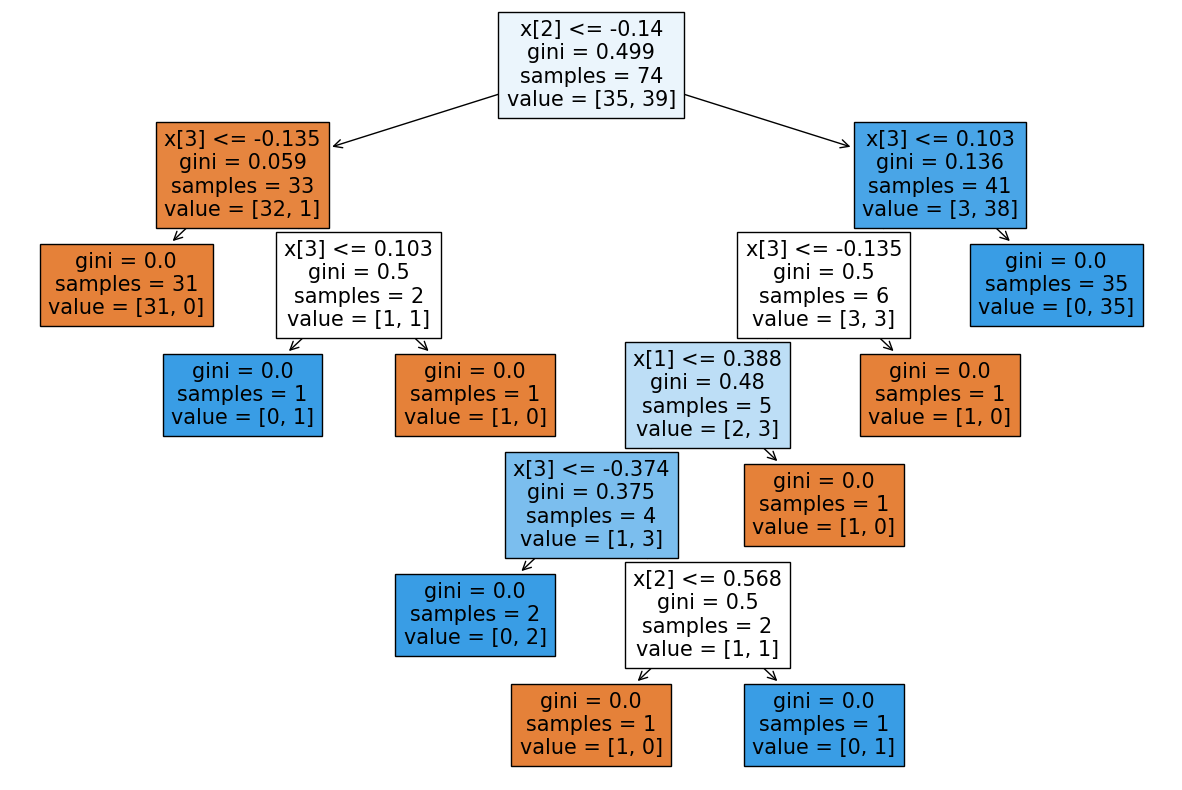

In [24]:
from sklearn import tree
plt.figure(figsize=(15,10))            ##Here it will show all the nodes possibles by taking all the default value of hyperparameters bt...this cause overfitting due to very large number of nodes...so that here we required the postprunning i.e fix the value of max_depth
tree.plot_tree(classifier,filled=True)

In [26]:
#prediction
y_pred=classifier.predict(X_test)

In [27]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
accuracy_score(y_pred,y_test)

0.88

In [30]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.93      0.88      0.90        16\n           1       0.80      0.89      0.84         9\n\n    accuracy                           0.88        25\n   macro avg       0.87      0.88      0.87        25\nweighted avg       0.89      0.88      0.88        25\n'

In [31]:
confusion_matrix(y_pred,y_test)

array([[14,  2],
       [ 1,  8]], dtype=int64)

# Observation: Without postprunning or preprunning or any hyperparameter tunning the accuracy of the model is 88%

In [32]:
##with the help of post prunning

In [63]:
##Postprunning
classifier=DecisionTreeClassifier(max_depth=1)

In [64]:
classifier.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[2] <= -0.14\ngini = 0.499\nsamples = 74\nvalue = [35, 39]'),
 Text(0.25, 0.25, 'gini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(0.75, 0.25, 'gini = 0.136\nsamples = 41\nvalue = [3, 38]')]

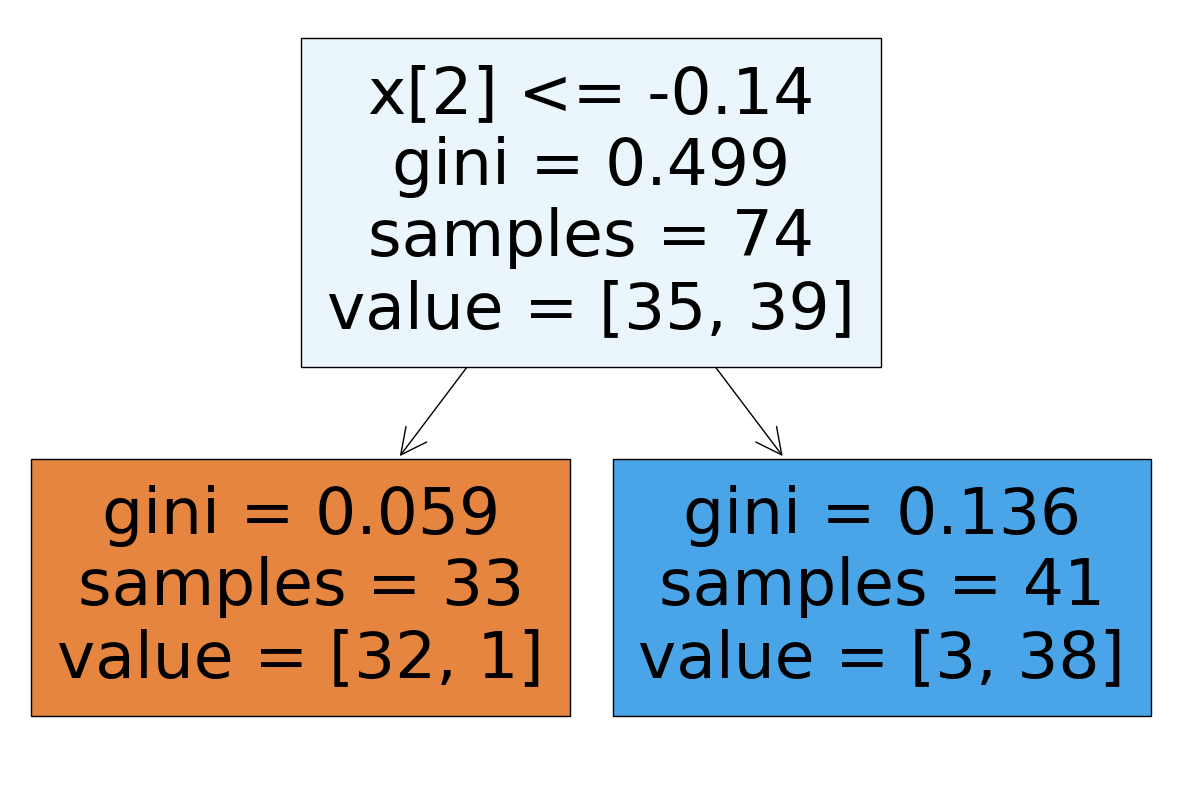

In [70]:
from sklearn import tree
plt.figure(figsize=(15,10))            
tree.plot_tree(classifier,filled=True)

In [71]:
#prediction
y_pred=classifier.predict(X_test)

In [72]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [74]:
accuracy_score(y_pred,y_test)

0.88

In [75]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.93      0.88      0.90        16\n           1       0.80      0.89      0.84         9\n\n    accuracy                           0.88        25\n   macro avg       0.87      0.88      0.87        25\nweighted avg       0.89      0.88      0.88        25\n'

In [46]:
confusion_matrix(y_pred,y_test)

array([[15,  3],
       [ 0,  7]], dtype=int64)

In [47]:
##Preprunning i.e hyperparameter tunning by using the GridSEarchCV and also the Crossvalidation

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [51]:
classifier=DecisionTreeClassifier()
cv=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [54]:
cv.fit(X_train,y_train)

C:\Users\nikit\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\nikit\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\nikit\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\nikit\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'log2',
 'splitter': 'best'}

In [56]:
cv.best_score_

0.9457142857142857

In [57]:
#Prediction
y_pred=cv.predict(X_test)

In [58]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score, classification_report

In [60]:
accuracy_score(y_pred,y_test)

0.88

In [61]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.93      0.88      0.90        16\n           1       0.80      0.89      0.84         9\n\n    accuracy                           0.88        25\n   macro avg       0.87      0.88      0.87        25\nweighted avg       0.89      0.88      0.88        25\n'

In [62]:
confusion_matrix(y_test,y_pred)

array([[14,  1],
       [ 2,  8]], dtype=int64)